## 범주형 데이터 처리
- 범주형 데이터는 일반적인 모델링 수학적 연산형 모델링 다수가 존재한다. 이런 경우 범주형 데이터가 사용 불가능하기 때문에 특별하게 처리
- 더미 변수 생성
- 더미변수 == 범주형 데이터들을 각각의 column으로 생성, 해당 범주에 속하는지를 0과 1로 표현

In [3]:
import pandas as pd
from sklearn.datasets import load_wine


In [4]:
wine_load = load_wine()

In [5]:
wine = pd.DataFrame(wine_load['data'], columns= wine_load['feature_names'])

In [6]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
wine['Class'] = wine_load['target']
wine['Class']

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int32

In [8]:
# Class column의 데이터들을 변경
wine['Class'] = wine['Class'].map(
    {
        0 : 'class_0',
        1 : 'class_1',
        2 : 'class_2'
    }
)

In [9]:
wine['Class'].value_counts()

Class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [10]:
## Class column의 데이터를 더미변수로 생성

## get + dummies == get_dummies()

wine_dummy = pd.get_dummies(wine, columns= ['Class'])

In [11]:
wine_dummy.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class_class_0,Class_class_1,Class_class_2
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,True,False,False
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,True,False,False
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,True,False,False
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,True,False,False
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,True,False,False


In [12]:
wine_dummy['Class_class_0'].value_counts()

Class_class_0
False    119
True      59
Name: count, dtype: int64

### 데이터의 분할
- 분석 모델을 학습하고 성과를 확인하기 위해 데이터를 train, test 세트로 분할하고 독립변수와 종속변수로 분리하는 작업
- 분석 방법에 따라 train, validation, test 세트로 나누기도 한다.
- 적절한 비율
    - train : test == 7 : 3
    - train : validation : test == 6 : 2 : 2
- sklearn에 내장된 train_test_split() 함수를 이용하여 분할
    - train_test_split(x, y, test_size = None, random_state = None,shuffle =
    bool, stratify = None)
        - x : 독립 변수 데이터
        - y : 종속 변수 데이터
        - test_size : 테스트 데이터의 비율 (0부터 1 사이의 값)
        - random_state : 임의의 번호를 지정, 같은 숫자를(시드를) 이용한다면 같은 값들이 출력
        - shuffle : True면 추출 전에 데이터들을 섞는다.
        - stratify : None이 아닌 경우에는 지정된 변수를 기준으로 계층화를 하여 해당 변수의 비율이 유지되도록 추출
        

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [14]:
iris = pd.DataFrame(
    load_iris()['data'],
    columns= load_iris()['feature_names']
)

iris['Class'] = load_iris()['target']
iris['Class'] = iris['Class'].map(
    {
        0 : 'Setosa',
        1 : 'Versicolour',
        2 : 'Virginaca'

    }
)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [15]:
## 데이터를 분할

X_train, X_test, Y_train, Y_test = train_test_split(
    iris.drop('Class', axis = 1),
    iris['Class'],
    test_size= 0.3,
    random_state= 100
)

In [16]:
# train, test 개수를 확인

print('X_train의 개수 : ', X_train.shape, 'X_test의 개수 : ', X_test.shape)
print('Y_train의 개수 : ', Y_train.shape, 'Y_test의 개수 : ', Y_test.shape)

X_train의 개수 :  (105, 4) X_test의 개수 :  (45, 4)
Y_train의 개수 :  (105,) Y_test의 개수 :  (45,)


In [17]:
iris['Class'].value_counts()

Class
Setosa         50
Versicolour    50
Virginaca      50
Name: count, dtype: int64

In [18]:
Y_train.value_counts() # stratify가 None이어서 정확히 35 : 15로 나뉘지 않음

Class
Versicolour    39
Setosa         34
Virginaca      32
Name: count, dtype: int64

In [19]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    iris.drop('Class', axis=1),
    iris['Class'],
    test_size=0.3,
    random_state=100,
    stratify= iris['Class']
)

In [24]:
Y_train2.value_counts()

Class
Versicolour    35
Setosa         35
Virginaca      35
Name: count, dtype: int64

### 데이터 스케일링
- 알고리즘 분석의 대부분은 column간의 데이터의 범위가 크게 차이가 나는 경우에는 만족스러운 결과가 나오지 않는다.
- 값의 범위가 작은 column에 비해서 값의 범위가 큰 column이 타겟 변수를 예측하는데 큰 영향
- 스케일링 작업은 모든 column의 값의 범위를 같게 만들어주는 작업
- 데이터 스케일링 순서
    - 데이터 스케일링의 주의점은 train 데이터와 test 데이터를 같은 scaler 객체로 스케일링 해야 한다.

    1. Scaler 선택, 로드
    2. Scaler 객체 생성 (Class 생성)
    3. train 데이터의 분포를 저장
    4. train 데이터를 스케일링
    5. test 데이터를 스케일링
    6. 원래의 스케일로 변환

#### standard Scaler
- 표준화 방식이다. 기본 스케일링 방식으로 column들을 평균이 0, 분산이 1인 정규분포로 스케일링
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 굉장히 민감하기 때문에 이상치에 대한 확인 및 정제한 후 사용
- 회귀분석보다는 분류분석에서 유용

In [1]:
## Scaler 로드

from sklearn.preprocessing import StandardScaler

# Scaler 객체 생성 (Class 생성)

StdScaler = StandardScaler()

In [20]:
# train 데이터의 분포를 저장

StdScaler.fit(X_train2)

StandardScaler()

In [21]:
# train 데이터를 스케일링

X_train_sc = StdScaler.transform(X_train2)

In [22]:
X_test_sc = StdScaler.transform(X_test2)

In [27]:
# train 데이터가 잘 스케일링 되었는지 확인

print(round(X_train_sc.min(), 2))
print(round(X_train_sc.max(), 2))
print(round(X_train_sc.mean(), 2))
print(round(X_train_sc.std(), 2))


-2.14
2.75
-0.0
1.0


In [25]:
# test 데이터가 잘 스케일링 되었는지 확인
    # 평균 0, 표준편차가 1이 맞지 않는 이유는 데이터의 수가 적어서 맞추지 못 한것 -> train만 fit 해야하고, 전체 데이터의 수가 작기 때문에 train에 맞춘 분포가 test에 맞지 않을 수 있음
        # 이는 데이터가 많아지면 test의 분포가 train의 분포와 유사하게 변함
        # 기준을 하나만 가져야 정확한 결과가 나오기에 train만 fit 해야함

print(round(X_test_sc.min(), 2))
print(round(X_test_sc.max(), 2))
print(round(X_test_sc.mean(), 2))
print(round(X_test_sc.std(), 2))

-2.63
3.23
-0.08
1.03


#### Min-Max Scaler
- 정규화 방식으로 column들을 0과 1사이의 값으로 스케일링 하는 방식
- 최소값 == 0, 최대값 == 1
- 이상치에 굉장히 민감하므로 이상치를 미리 확인 및 정제
- 분류 분석보다는 회귀 분석에서 주로 사용

In [28]:
# Scaler를 로드

from sklearn.preprocessing import MinMaxScaler

# Scaler 객체를 생성 (Class 생성)

MmScaler = MinMaxScaler()

In [29]:
# train 데이터의 분포를 저장

MmScaler.fit(X_train2)

MinMaxScaler()

In [30]:
# train 데이터를 스케일링

X_train_sc2 = MmScaler.transform(X_train2)

In [31]:
# test 데이터를 스케일링

X_test_sc2 = MmScaler.transform(X_test2)

In [36]:
# train 데이터가 잘 스케일링 되었는지 확인

print(round(X_train_sc2.min(), 2))
print(round(X_train_sc2.max(), 2))
print(round(X_train_sc2.mean(), 2))
print(round(X_train_sc2.std(), 2))


0.0
1.0
0.45
0.27


In [33]:
# test 데이터가 잘 스케일링 되었는지 확인
    # 평균 0, 표준편차가 1이 맞지 않는 이유는 데이터의 수가 적어서 맞추지 못 한것 

print(round(X_test_sc2.min(), 2))
print(round(X_test_sc2.max(), 2))
print(round(X_test_sc2.mean(), 2))
print(round(X_test_sc2.std(), 2))

-0.1
1.1
0.43
0.27


#### Max Abs Scaler
- 최대 절대값을 1로, 0을 0으로 기준삼아 1과 0이 되도록 모든 값이 -1에서 1까지로 표현
- 스케일링 데이터들이 모두 양수라면 Min-Max와 동일
- 이상치에 대해 굉장히 민감하므로 이상치를 확인 및 정제
- 분류보다는 회귀분석시에 유용

In [39]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

MaScaler.fit(X_train2)

X_train_sc3 = MaScaler.transform(X_train2)
X_test_sc3 = MaScaler.transform(X_test2)

In [42]:
# train 데이터가 잘 스케일링 되었는지 확인

print(round(X_train_sc3.min(), 2)) # 0부터 시작해야 하지만 실제 데이터에 0이 없기에 가장 작은 값인 0.04부터 시작
print(round(X_train_sc3.max(), 2))
print(round(X_train_sc3.mean(), 2))
print(round(X_train_sc3.std(), 2))


0.04
1.0
0.63
0.24


In [43]:
# test 데이터가 잘 스케일링 되었는지 확인
    # 평균 0, 표준편차가 1이 맞지 않는 이유는 데이터의 수가 적어서 맞추지 못 한것 

print(round(X_test_sc3.min(), 2))
print(round(X_test_sc3.max(), 2))
print(round(X_test_sc3.mean(), 2))
print(round(X_test_sc3.std(), 2))

0.08
1.05
0.61
0.24


#### Robust Scaler
- 평균과 분산 대신에 중앙값과 사분위 값을 활용하는 방식
- 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화 할 수 있는 스케일링 방식
- quantile_range 매개변수 (기본값이 [0.25, 0.75]를 조정하여 더 넓거나 좁은 범위의 값을 이상치로 설정하여 정제할 수 있다.)

In [45]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

RuScaler.fit(X_train2)

X_train_sc4 = RuScaler.transform(X_train2)
X_test_sc4 = RuScaler.transform(X_test2)

In [46]:
# train 데이터가 잘 스케일링 되었는지 확인

print(round(X_train_sc4.min(), 2)) # 0부터 시작해야 하지만 실제 데이터에 0이 없기에 가장 작은 값인 0.04부터 시작
print(round(X_train_sc4.max(), 2))
print(round(X_train_sc4.mean(), 2))
print(round(X_train_sc4.std(), 2))

-1.33
2.0
-0.03
0.6


In [47]:
# test 데이터가 잘 스케일링 되었는지 확인
    # 평균 0, 표준편차가 1이 맞지 않는 이유는 데이터의 수가 적어서 맞추지 못 한것 

print(round(X_test_sc4.min(), 2))
print(round(X_test_sc4.max(), 2))
print(round(X_test_sc4.mean(), 2))
print(round(X_test_sc4.std(), 2))

-1.67
2.33
-0.08
0.62


#### 원본의 스케일로 변경
- 스케일링을 한 데이터를 원본 데이터로 변경


In [48]:
pd.DataFrame(X_train_sc4).head()

,0,1,2,3
0,0.230769,-0.333333,-0.111111,-0.066667
1,-0.230769,-0.666667,0.000000,-0.133333
2,-0.615385,1.000000,-0.833333,-0.800000
3,-0.538462,0.833333,-0.833333,-0.733333
4,-0.076923,1.333333,-0.750000,-0.733333


In [49]:
X_origin = RuScaler.inverse_transform(X_train_sc4)

In [50]:
pd.DataFrame(X_origin)

,0,1,2,3
0,6.1,2.8,4.0,1.3
1,5.5,2.6,4.4,1.2
2,5.0,3.6,1.4,0.2
3,5.1,3.5,1.4,0.3
4,5.7,3.8,1.7,0.3
...,...,...,...,...
100,5.0,3.4,1.6,0.4
101,5.6,2.5,3.9,1.1
102,6.3,2.9,5.6,1.8
103,6.7,3.1,4.4,1.4


#### 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확하게 분류하는 것이 중요
- 일반적으로 이상 데이터가 target 값이 되는 경우가 많다.
- 데이터가 불균형할 때는 분류의 성능과 target 데이터를 정확히 분류해내는 목표가 일치하지 않게 되는 현상이 발생 (성능이 떨어진다)
- 분석 결과, 머신러닝 등 모델링에서 문제가 발생
- 소수의 데이터인 target의 중요도를 낮게 판단하므로 궁극적으로 분석 가능한 모델이 생성되지 않는다.
- 소수의 비정상 데이터를 늘리는 오버샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더샘플링이 존재

#### 언더샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터셋이 가진 라벨의 수 수준으로 감소시키는 방법
- 데이터의 불균형 문제를 해결은 가능하지만, 데이터의 개수가 줄어듦으로 학습에 대한 성능이 떨어질 수 있다.

In [52]:
!pip install imbalanced-learn

In [53]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [54]:
## 분포가 불균형한 데이터를 생성 (95:1)

x, y = make_classification(n_samples=5000, n_features=5, weights= [0.95])

- 랜덤언더샘플링은 다수를 차지하는 라벨에서 무작위로 데이터를 제거하는 방법
- sampling_stratery 매개변수에 값을 majority로 지정하면 다수의 라벨의 데이터를 샘플링해서 소수의 라벨 데이터의 수와 같게 만든다.
- 0과 1 사이의 값으로 지정하면 소수 라벨의 데이터 수와 다수 라벨의 데이터 수가 해당하는 비율에 맞게 조정

In [60]:
undersample = RandomUnderSampler(sampling_strategy='majority')

In [61]:
x_under, y_under = undersample.fit_resample(x, y)

In [63]:
print(Counter(y_under))

Counter({0: 283, 1: 283})


In [65]:
undersample2 = RandomUnderSampler(sampling_strategy=0.5) # 적은 데이터가 많은 데이터의 50%인
x_under2, y_under2 = undersample2.fit_resample(x, y)

In [68]:
print(Counter(y_under2))

Counter({0: 566, 1: 283})


#### 오버샘플링
- 소수의 라벨을 지닌 데이터셋을 다수 라벨을 지닌 데이터셋의 수만큼 증식시켜서 학습에 사용하기 위한 충분한 양과 데이터를 확보하는 방법
- 데이터의 손실이 없어서 일반적으로 언더 샘플링보다는 성능이 유리하여 주로 사용



#### 랜덤 오버 샘플링
- 소수의 라벨을 지닌 데이터셋을 단순 복제하여 다수의 라벨과 비율을 맞추는 방법
- 데이터를 단순하게 복제하기에 분포는 변하지 않지만 그 수가 증가하므로 같은 비율로 가중치를 받을 수 있다.
- 오버피팅의 위험성이 다분하지만 불균형 문제를 처리하지 않는 것 보다는 유효

In [70]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy= 0.5)

x_over, y_over = oversample.fit_resample(x, y)

print(Counter(y_over))

Counter({0: 4717, 1: 2358})


In [71]:
oversample2 = RandomOverSampler(sampling_strategy='minority') # 여긴 'majority'가 아니라 'minority' # 작은 값을 바꿔주니까 minority
x_over2, y_over2 = oversample2.fit_resample(x, y)

print(Counter(y_over2))

Counter({0: 4717, 1: 4717})


#### SMOTE
- 소수 라벨을 지닌 데이터셋의 관측 값에 대한 k개의 최근접 이웃을 찾고 관측값과 이웃으로 선택된 값 사이에 임의의 데이터를 생성하는 방법

In [72]:
from imblearn.over_sampling import SMOTE

smote_sample = SMOTE(sampling_strategy='minority')

x_sm, y_sm = smote_sample.fit_resample(x, y)

print(Counter(y_sm))

Counter({0: 4717, 1: 4717})


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'SMOTE')

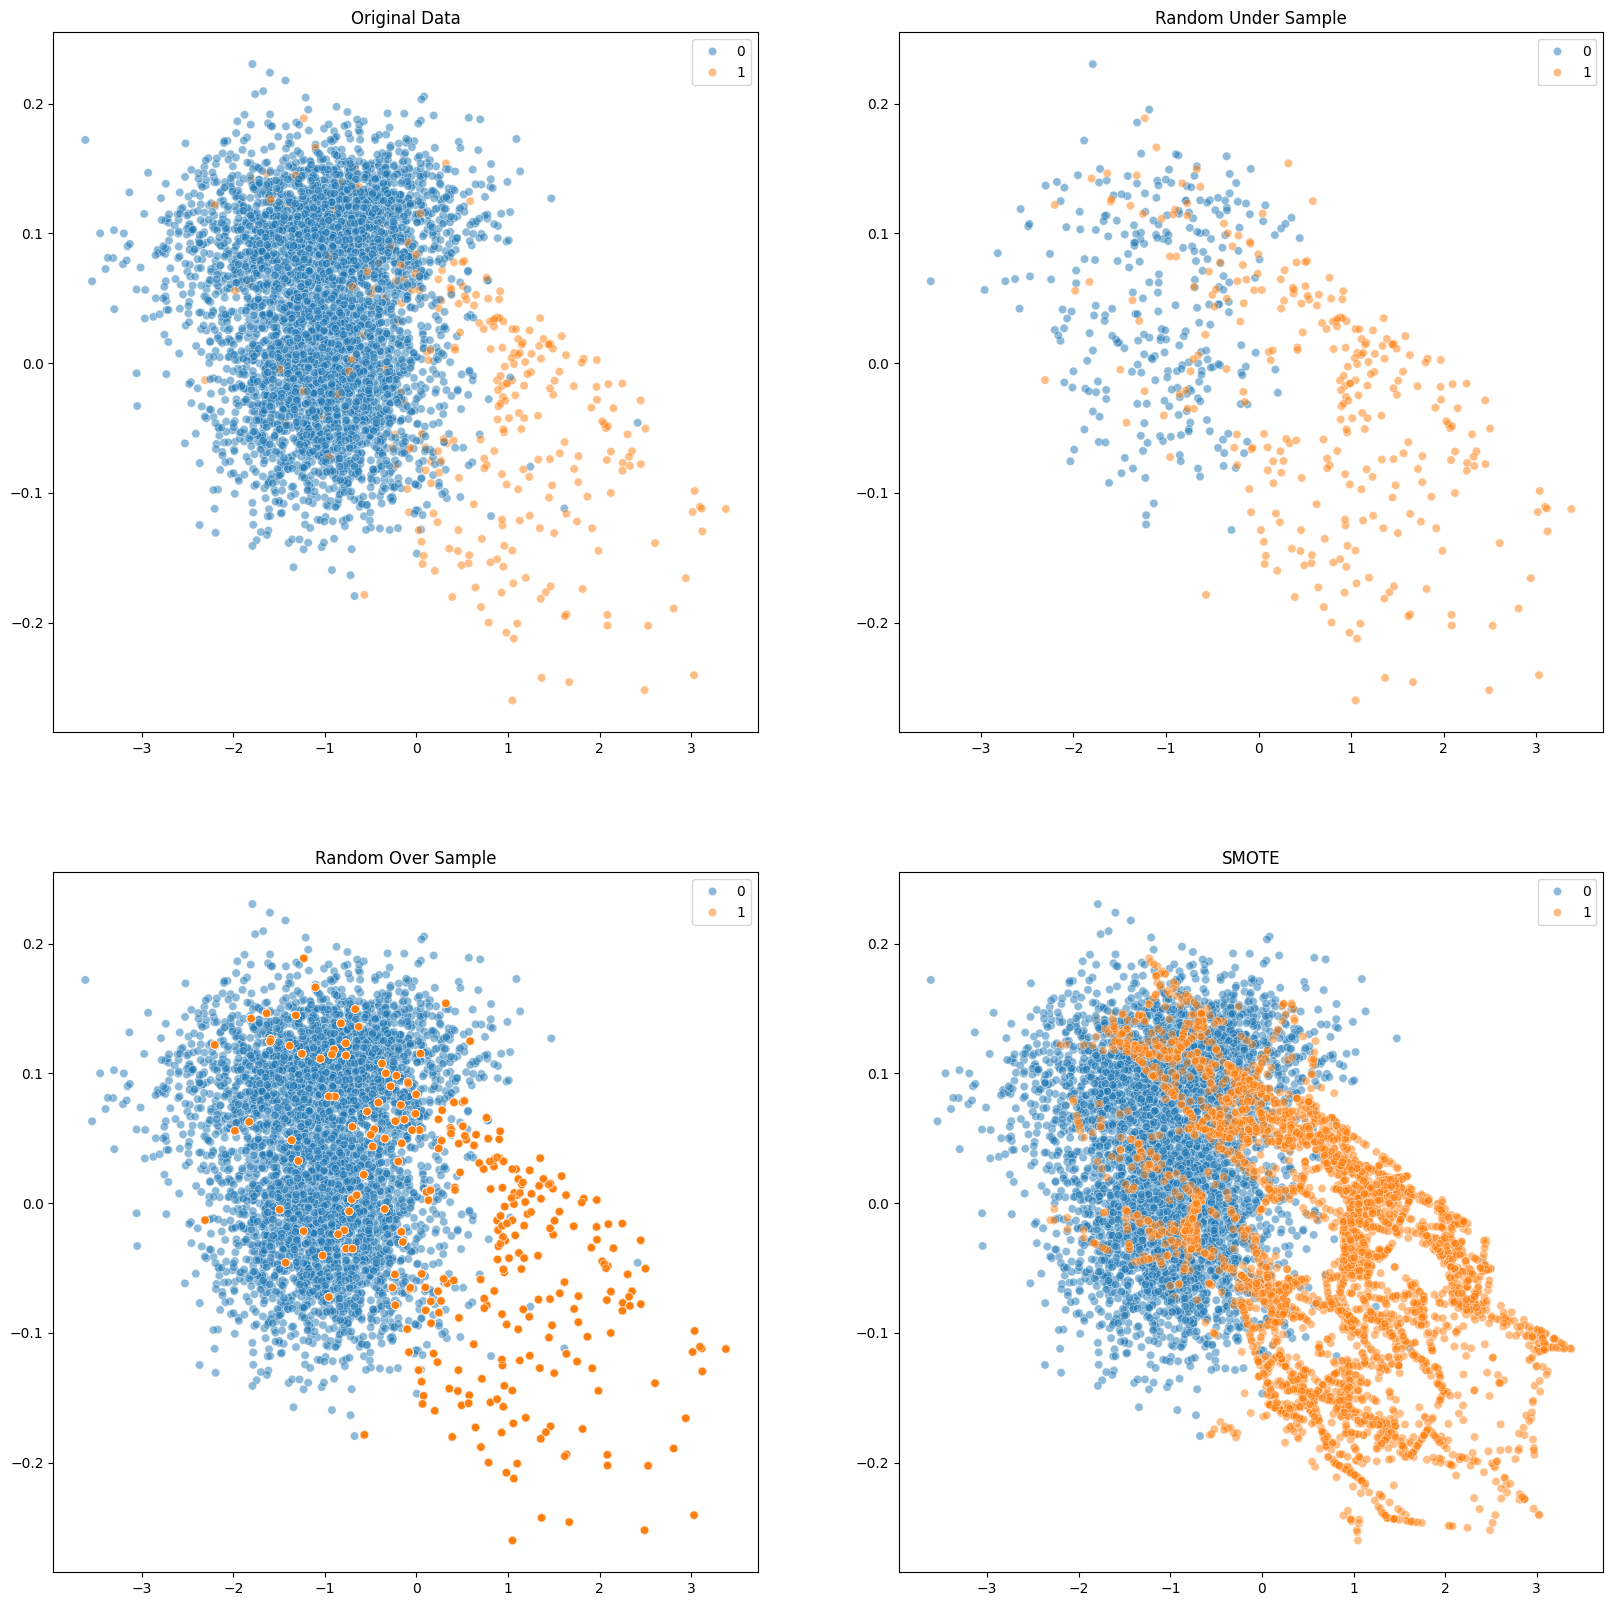

In [77]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))

sns.scatterplot(x = x[:, 1], y = x[:, 2], hue= y, ax = axes[0][0], alpha = 0.5)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], hue= y_under, ax = axes[0][1], alpha = 0.5) # hue == 축의 범위
sns.scatterplot(x = x_over2[:, 1], y = x_over2[:, 2], hue= y_over2, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], hue= y_sm, ax = axes[1][1], alpha = 0.5)


axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random Over Sample')
axes[1][1].set_title('SMOTE')